<a href="https://colab.research.google.com/github/Gitinitty-5/Python-Projects/blob/main/House_Price_Prediction_ipyB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estimation of House Prices Prediction in the for Real Estate Agencies in Carlifonia for Using Logistic Regression Model of Machine Learning
.In this example, we want to investigate what factors/variables affect the Median House Value

.Make predictions whether various variables could be subjected to
future house value and not based on their characteristics.

.Hence our Dependent variable(y) is the median_house_value if other variables could be  prone to house values

##1.1 Importing Libraries

In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy as sc

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(15,6)})


##1.2 Data Acquisition

In [2]:
from google.colab import drive
from google.colab import files # Import the 'files' object from google.colab

drive.mount('/content/drive')
uploaded = files.upload() # Now 'files' is defined and the upload() function should be available

Mounted at /content/drive


Saving housing_prices.xlsx to housing_prices.xlsx


##1.3 Loading and showcasing Data & Indicating Features

In [3]:
##load raw data
df = pd.read_excel('housing_prices.xlsx')

#print table
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,83.252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,83.014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,72.574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,56.431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,38.462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,15.603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,25.568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,23.873,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,18.672,84700,INLAND


In [4]:
# Check the column types
df.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,int64
total_rooms,int64
total_bedrooms,float64
population,int64
households,int64
median_income,float64
median_house_value,int64
ocean_proximity,object


In [5]:
# Convert 'median_income' to numeric, coercing errors into NaN
df['median_income'] = pd.to_numeric(df['median_income'], errors='coerce')

# Drop rows where 'median_income' is NaN (these were originally non-float values)
df = df.dropna(subset=['median_income'])

# Reset the index after row removal
df.reset_index(drop=True, inplace=True)

# Confirm the changes
print(df['median_income'].dtypes)  # Should now be float64
df.head

float64


<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  median_house_value  \
0             322         126         83.252              452600   
1            2401        1138         83.014              358500   
2             496         177         72.574              352100   
3             558         219         56.431              341300   
4             565         259         38.462              342200   
...           ...         ...            ...                 ...   
20635         845         330         15.603               78100   
20636         356         114         25.568               77100   
20637        1007         433         23.873               92300   
20638         741         349         18.672               84700   
20639        1387         530         23.886               89400   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]>

In [6]:
df.shape

(20640, 10)

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,34.801612,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,21.722469,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,21.160750,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,32.384500,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,45.936500,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,150.001000,500001.000000


In [8]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [9]:
df.dropna(inplace = True)

In [10]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [11]:
df.shape

(20433, 10)

##1.4 Find the correlation across variables

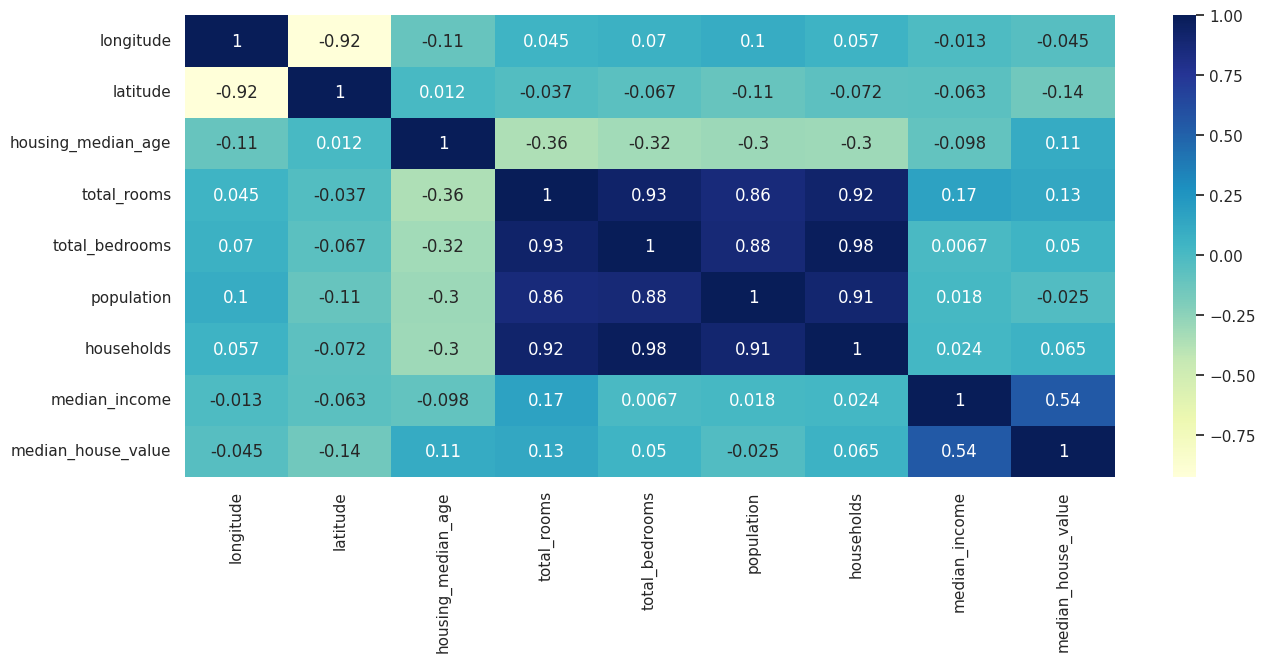

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])  # Excludes datetime columns

# Calculate the correlation matrix for numerical features
corr_matrix = numerical_df.corr()

# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

##1.5 Histogram Distribution of variables

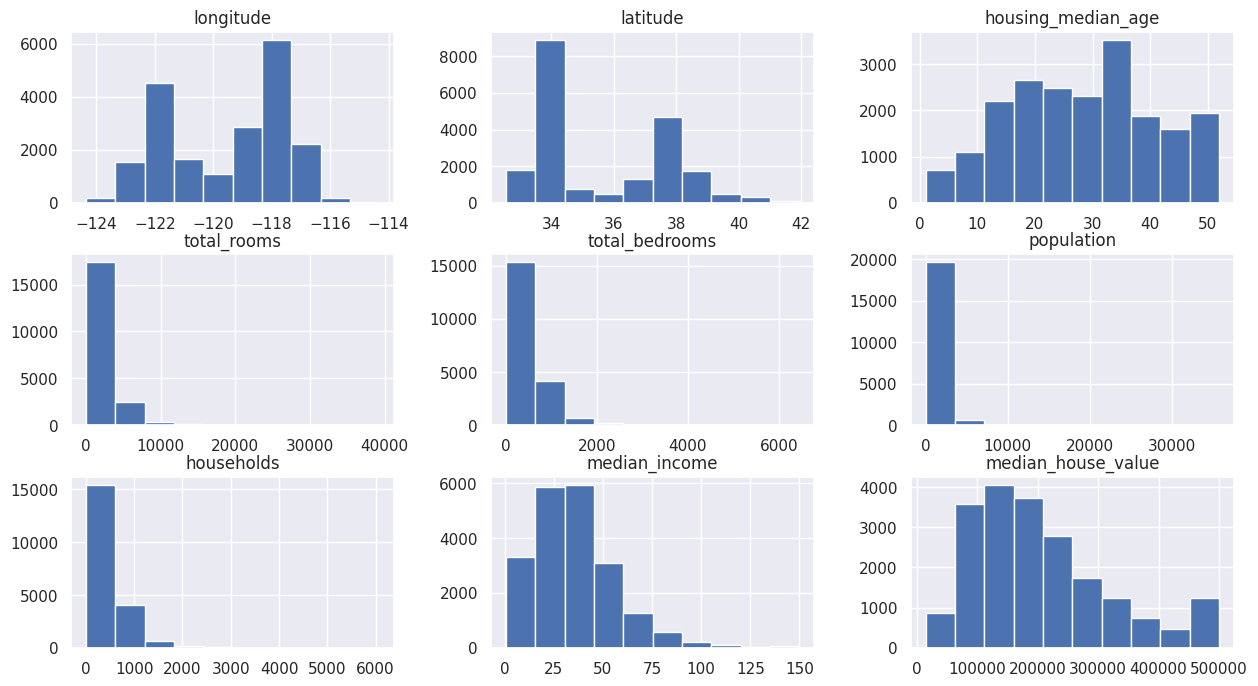

In [13]:
#plotting all variables
df.hist(figsize = (15,8))
plt.show()

In [14]:
##Taking logarithms of variables with skewed distribution
df['total_rooms'] = np.log(df['total_rooms'] + 1)
df['total_bedrooms'] = np.log(df['total_bedrooms'] + 1)
df['population'] = np.log(df['population'] + 1)
df['households'] = np.log(df['households'] + 1)

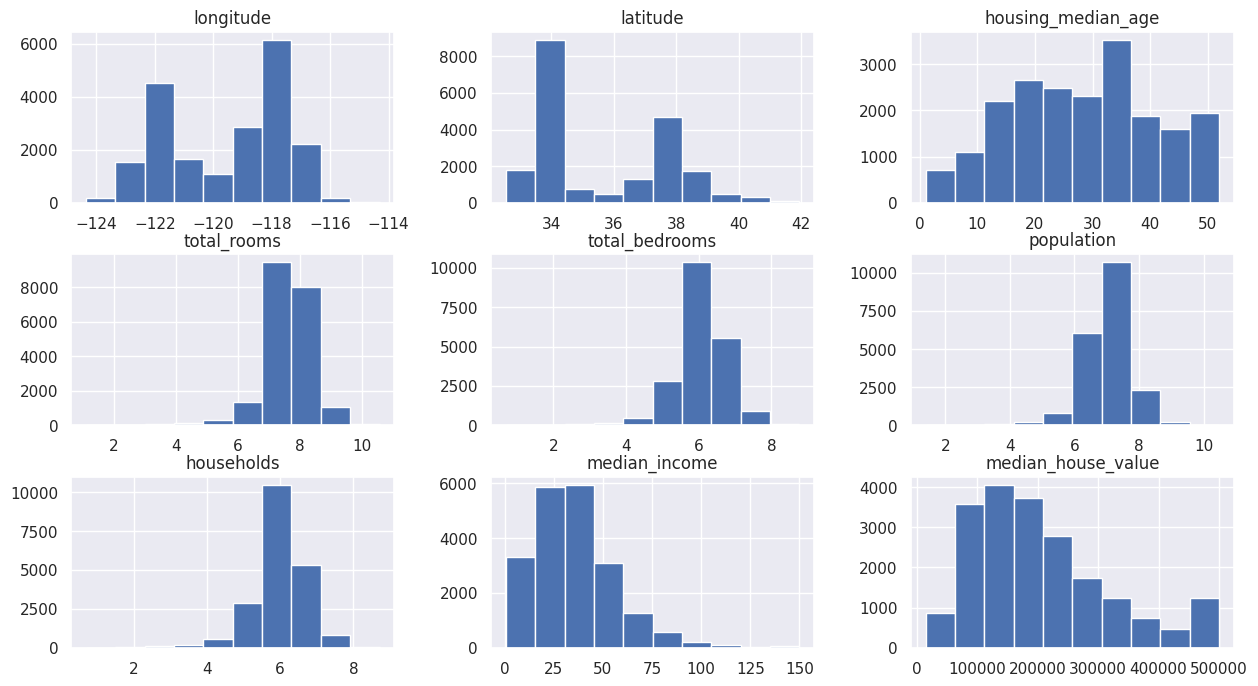

In [15]:
#plotting all variables
df.hist(figsize = (15,8))
plt.show()

In [16]:
df.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [17]:
# Create dummy variables for 'ocean_proximity'
ocean_proximity_dummies = pd.get_dummies(df['ocean_proximity'], prefix='ocean_proximity', drop_first=True).astype(int)

# Join the dummy variables to the original DataFrame and drop the 'ocean_proximity' column
df_encoded = df.join(ocean_proximity_dummies).drop('ocean_proximity', axis=1)

# Display the updated DataFrame
print(df_encoded.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41     6.781058        4.867534   
1    -122.22     37.86                  21     8.867850        7.009409   
2    -122.24     37.85                  52     7.291656        5.252273   
3    -122.25     37.85                  52     7.150701        5.463832   
4    -122.25     37.85                  52     7.395108        5.638355   

   population  households  median_income  median_house_value  \
0    5.777652    4.844187         83.252              452600   
1    7.784057    7.037906         83.014              358500   
2    6.208590    5.181784         72.574              352100   
3    6.326149    5.393628         56.431              341300   
4    6.338594    5.560682         38.462              342200   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                       0                         1   
1     

In [18]:
df_encoded.shape


(20433, 13)

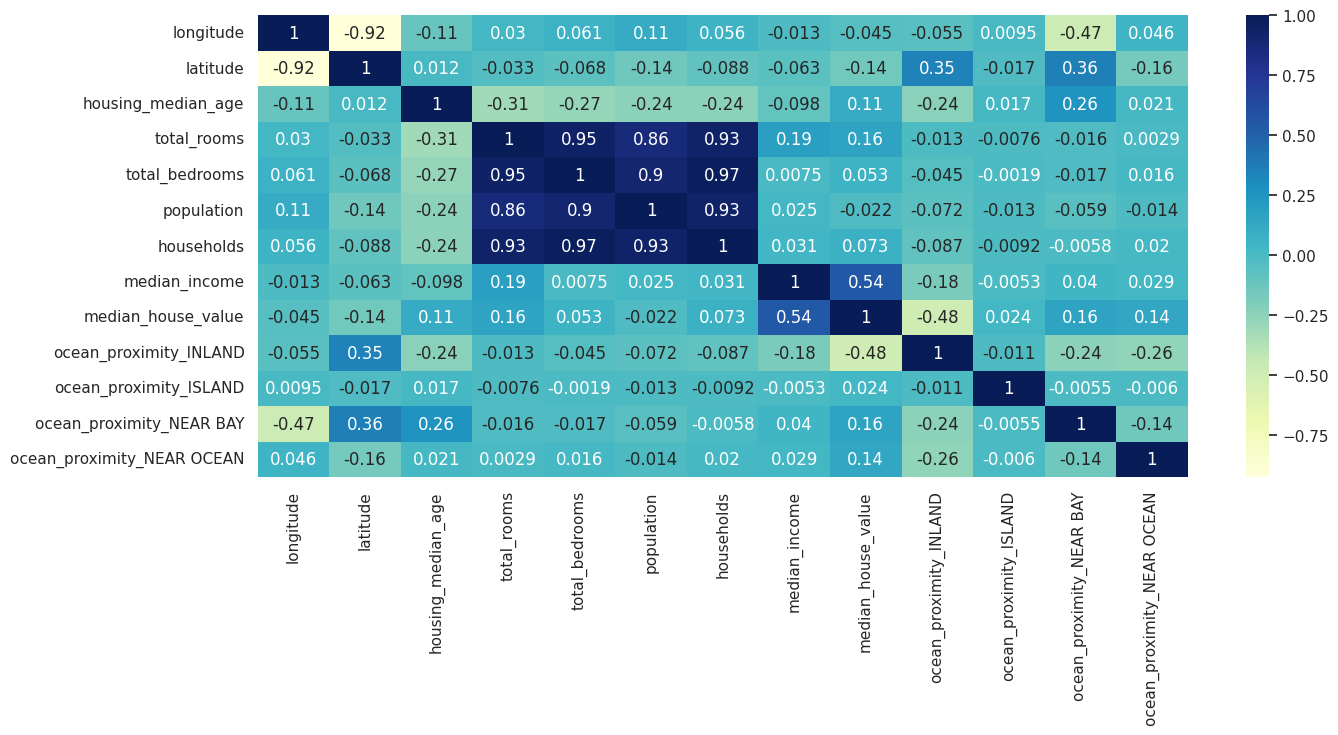

In [19]:
sns.heatmap(df_encoded.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

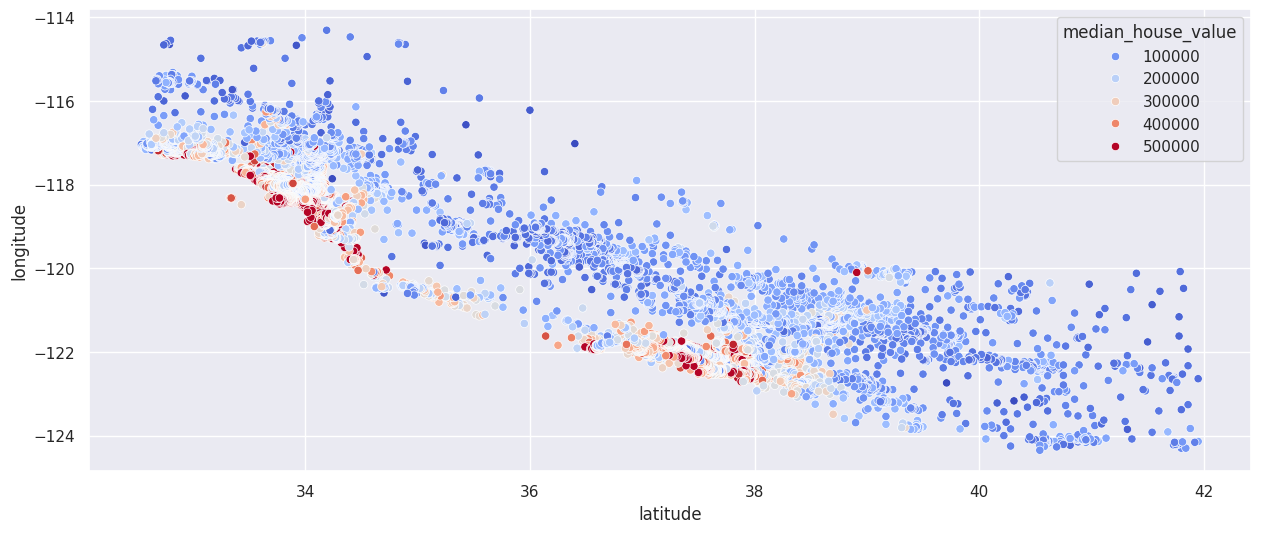

In [20]:
sns.scatterplot(data = df_encoded, x = 'latitude', y = 'longitude', hue = 'median_house_value', palette = 'coolwarm')
plt.show()

In [21]:
# Split data into (x) & (y)
x = df_encoded.drop('median_house_value', axis=1)  # This keeps x as a DataFrame
y = df_encoded['median_house_value'] # Corrected the column name from 'medium_house_value' to 'median_house_value'

# Check data types
y = y.astype(int)
x = x.astype(int)

# Print shapes of x and y
print(x.shape)
print(y.shape)

# Check the columns of x
print("Columns in x:", x.columns)

(20433, 12)
(20433,)
Columns in x: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')


In [22]:
# first one
x_train, x_test, y_train,y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state =15)

# Second one
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)


print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(14711, 12)
(4087, 12)
(1635, 12)
(14711,)
(4087,)
(1635,)


In [23]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122,37,41,6,4,5,4,83,0,0,1,0
1,-122,37,21,8,7,7,7,83,0,0,1,0
2,-122,37,52,7,5,6,5,72,0,0,1,0
3,-122,37,52,7,5,6,5,56,0,0,1,0
4,-122,37,52,7,5,6,5,38,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121,39,25,7,5,6,5,15,1,0,0,0
20636,-121,39,18,6,5,5,4,25,1,0,0,0
20637,-121,39,17,7,6,6,6,23,1,0,0,0
20638,-121,39,18,7,6,6,5,18,1,0,0,0


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

reg = LinearRegression()
reg.fit(x_train_s, y_train)

LinearRegression()

In [25]:
reg.score(x_test_s, y_test)

0.4855524503688925

In [26]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)


RandomForestRegressor()

In [27]:
forest.score(x_test_s, y_test)

0.6311234854895372

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
   "n_estimators": [3, 10, 30],
   "max_features": [2, 4, 6, 8]
}
grid_search = GridSearchCV(forest, param_grid, cv = 5,
                           scoring = "neg_mean_squared_error",
                           return_train_score = True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [29]:
best_forest = grid_search.best_estimator_

In [30]:
best_forest.score(x_test_s, y_test)

0.6461920202857625